In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
data = pd.read_csv('ASIANPAINT.csv')

In [3]:
# Extracting the 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [4]:
training_data_len = int(len(scaled_prices) * 0.8)  # using 80% for training, 20% for testing

train_data = scaled_prices[:training_data_len]
test_data = scaled_prices[training_data_len:]

In [5]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 25  
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

In [6]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
132/132 [==============================] - 5s 15ms/step - loss: 0.0047
Epoch 2/50
132/132 [==============================] - 2s 15ms/step - loss: 0.0011
Epoch 3/50
132/132 [==============================] - 2s 16ms/step - loss: 8.9330e-04
Epoch 4/50
132/132 [==============================] - 2s 15ms/step - loss: 7.6189e-04
Epoch 5/50
132/132 [==============================] - 2s 15ms/step - loss: 6.5593e-04
Epoch 6/50
132/132 [==============================] - 2s 16ms/step - loss: 6.4675e-04
Epoch 7/50
132/132 [==============================] - 2s 17ms/step - loss: 5.0728e-04
Epoch 8/50
132/132 [==============================] - 2s 17ms/step - loss: 4.9472e-04
Epoch 9/50
132/132 [==============================] - 2s 15ms/step - loss: 4.6826e-04
Epoch 10/50
132/132 [==============================] - 2s 14ms/step - loss: 4.3721e-04
Epoch 11/50
132/132 [==============================] - 2s 14ms/step - loss: 4.0711e-04
Epoch 12/50
132/132 [==============================] - 2s 15

In [7]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

33/33 [==============================] - 1s 6ms/step


In [8]:
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1619.515142806659


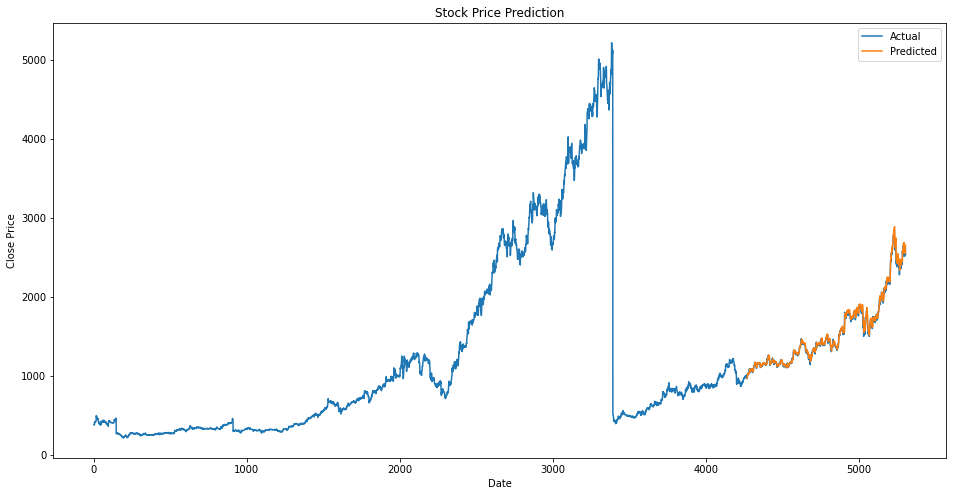

In [9]:
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(data['Close'], label='Actual')
plt.plot(range(training_data_len + time_steps, len(data)), predictions, label='Predicted')
plt.legend()
plt.show()